# Sized Buyer Profiles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
bid=pd.read_excel('bid19to21.xlsx')
stock=pd.read_excel('stock19to21.xlsx')

In [3]:
bid['buyer_username']=bid['buyer_username'].str.lower()
stock['buyer_username']=stock['buyer_username'].str.lower()

In [4]:
min_resale=pd.read_excel('min_resale.xlsx')

In [5]:
min_resale['margin_lvl'] = pd.cut(min_resale['margin'],[-float('inf'),0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,float('inf')],
                             labels=['<0%','0-10%','11-20%','21-30%','31-40%', '41-50%', '51-60%',
                                     '61-70%', '71+%'])

In [6]:
min_resale['buyer_username']=min_resale['buyer_username'].str.lower()

In [7]:
bid['bid_placed']=pd.to_datetime(bid['bid_placed'])
stock['submitted_date']=pd.to_datetime(stock['submitted_date'])

In [8]:
bid['win']='N'
bid.loc[bid['bid']>=bid['winning_bid'],'win']='Y'

In [9]:
bid21=bid[bid['bid_placed'].dt.year==2021]
stock21=stock[stock['submitted_date'].dt.year==2021]

## Whales
Wholesale GMV of $180k+

### Rue Gilt
Monthly Buyer

In [10]:
rg_b=bid21[bid21['buyer_username']=='rue gilt']
rg_s=stock21[stock21['buyer_username']=='rue gilt']

In [11]:
rg_mr=min_resale[min_resale['buyer_username']=='rue gilt']

In [12]:
rg_s['brand_name'].value_counts()[:5]

Hermès            376
Louis Vuitton     231
Gucci             197
Chanel             65
Christian Dior     19
Name: brand_name, dtype: int64

In [13]:
top5=rg_b['brand_name'].value_counts()[:5].index

In [14]:
# percentage of won bids by brand
(rg_b[rg_b['brand_name'].isin(top5)].groupby(['brand_name'])['win']
 .value_counts(normalize=True)*100).sort_index(ascending=False)

brand_name      win
Louis Vuitton   Y      35.538613
                N      64.461387
Hermès          Y      52.529762
                N      47.470238
Gucci           Y      59.876543
                N      40.123457
Christian Dior  Y      24.305556
                N      75.694444
Chanel          Y      36.619718
                N      63.380282
Name: win, dtype: float64

Percentage of won bids by brand

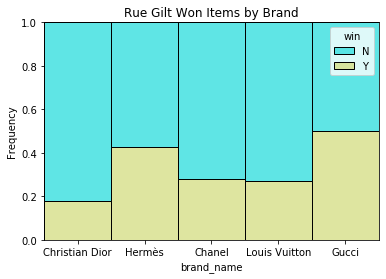

In [15]:
sns.histplot(x='brand_name', data=rg_b[rg_b['brand_name'].isin(top5)],
            hue='win', stat='frequency', multiple='fill', palette='rainbow',
            hue_order=['N','Y'])
plt.title('Rue Gilt Won Items by Brand')
plt.show()

In [16]:
rg_b['win'].value_counts(normalize=True)*100

N    59.847036
Y    40.152964
Name: win, dtype: float64

**40.15% win rate--very high**

In [17]:
rg_mr['has_min_resale']='N'
rg_mr.loc[(~rg_mr['min_resale'].isnull()), 'has_min_resale']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
rg_mr['has_min_resale'].value_counts(normalize=True)*100

N    71.892497
Y    28.107503
Name: has_min_resale, dtype: float64

Only 28% of Rue Gilt's stock purchases had minimum resale prices.

In [19]:
rg_mr['margin_lvl'].value_counts().sort_index()

<0%         0
0-10%       0
11-20%      0
21-30%      0
31-40%      1
41-50%      3
51-60%     32
61-70%     56
71+%      159
Name: margin_lvl, dtype: int64

Rue Gilt tends to purchase items with margins>30%.

In [20]:
rg_mr.groupby('brand_name')['margin_lvl'].value_counts().sort_index()

brand_name      margin_lvl
Chanel          51-60%          1
                61-70%          2
                71+%           13
Christian Dior  71+%            2
Fendi           31-40%          1
Goyard          51-60%          1
                61-70%          1
Gucci           41-50%          2
                51-60%         12
                61-70%         19
                71+%           38
Hermès          51-60%          2
                61-70%          4
                71+%            3
Louis Vuitton   41-50%          1
                51-60%         16
                61-70%         30
                71+%          103
Name: margin_lvl, dtype: int64

Margin levels split by brand

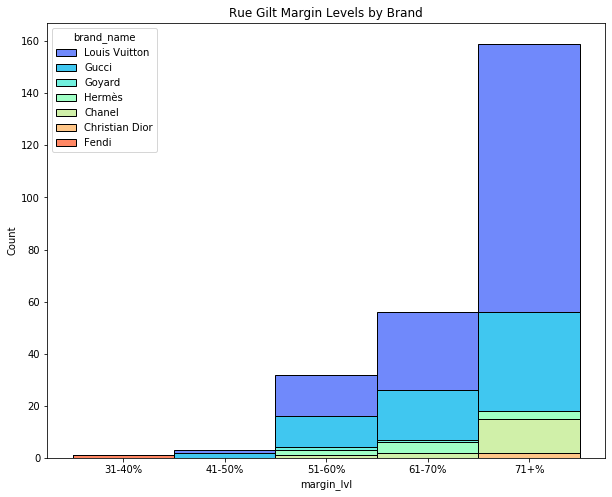

In [21]:
plt.figure(figsize=(10,8))
sns.histplot(x='margin_lvl', data=rg_mr[~rg_mr['margin_lvl'].isnull()],
            hue='brand_name', stat='count', multiple='stack', palette='rainbow')
plt.title('Rue Gilt Margin Levels by Brand')
plt.show()

In [22]:
rg_mr.groupby('brand_name')['price'].mean()

brand_name
Chanel            1162.307692
Christian Dior     600.368421
Fendi              319.000000
Goyard            1206.500000
Gucci              516.568528
Hermès             290.393617
Louis Vuitton      614.298701
Name: price, dtype: float64

Average prices by brand

In [23]:
rg_b[rg_b['win']=='Y']['winning_bid'].mean()

557.1229166666667

Average winning bid (for items that Rue Gilt has won)

In [24]:
rg_b[rg_b['win']=='Y'].groupby('brand_name')['winning_bid'].mean()

brand_name
Chanel             670.400285
Christian Dior     750.228571
Fendi              705.000000
Goyard            1027.000000
Gucci              513.587629
Hermès             331.256846
Louis Vuitton      658.936332
Name: winning_bid, dtype: float64

In [25]:
rg_s['price'].mean()

498.2721164613662

Average price of stock item purchase

-----

### The RealReal
Monthly Buyer

In [26]:
rr_b=bid21[bid21['buyer_username']=='the realreal']
rr_s=stock21[stock21['buyer_username']=='the realreal']
rr_mr=min_resale[min_resale['buyer_username']=='the realreal']

In [27]:
# percentage of won bids by brand
(rr_b.groupby(['brand_name'])['win']
 .value_counts(normalize=True)*100).sort_index(ascending=False)

brand_name      win
Hermès          Y        8.823529
                N       91.176471
Fendi           Y       28.571429
                N       71.428571
Christian Dior  Y      100.000000
Chanel          Y       20.833333
                N       79.166667
Name: win, dtype: float64

In [28]:
rr_b['win'].value_counts(normalize=True)*100

N    82.222222
Y    17.777778
Name: win, dtype: float64

Low win rate of 17.78%

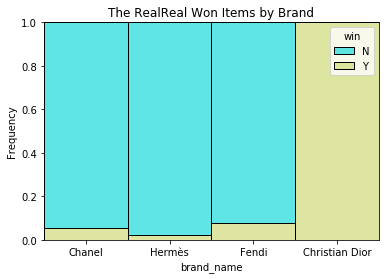

In [29]:
sns.histplot(x='brand_name', data=rr_b,
            hue='win', stat='frequency', multiple='fill', palette='rainbow',
            hue_order=['N','Y'])
plt.title('The RealReal Won Items by Brand')
plt.show()

In [30]:
rr_mr.loc[:,'has_min_resale']='N'
rr_mr.loc[(~rr_mr['min_resale'].isnull()), 'has_min_resale']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
rr_mr['has_min_resale'].value_counts(normalize=True)*100

N    61.496493
Y    38.503507
Name: has_min_resale, dtype: float64

38% of The RealReal's stock purchases had minimum resale prices.

In [32]:
rr_mr['margin_lvl'].value_counts().sort_index()

<0%         0
0-10%       0
11-20%      0
21-30%      3
31-40%      8
41-50%     35
51-60%     96
61-70%    139
71+%      213
Name: margin_lvl, dtype: int64

TRR purchases items with margins>20%.

In [33]:
rr_mr.groupby('brand_name')['margin_lvl'].value_counts().sort_index()

brand_name      margin_lvl
Bottega Veneta  61-70%         1
Burberry        51-60%         1
Celine          61-70%         2
Chanel          31-40%         1
                41-50%         8
                51-60%        14
                61-70%        22
                71+%          76
Chloé           61-70%         1
Christian Dior  51-60%         2
                61-70%         9
                71+%           5
Fendi           31-40%         2
                41-50%         4
                51-60%         9
                61-70%        12
                71+%          12
Goyard          51-60%         3
                61-70%         1
                71+%           2
Gucci           31-40%         2
                41-50%         5
                51-60%         7
                61-70%         1
                71+%           4
Hermès          41-50%         4
                51-60%        15
                61-70%        15
                71+%          27
Louis Vuitton   

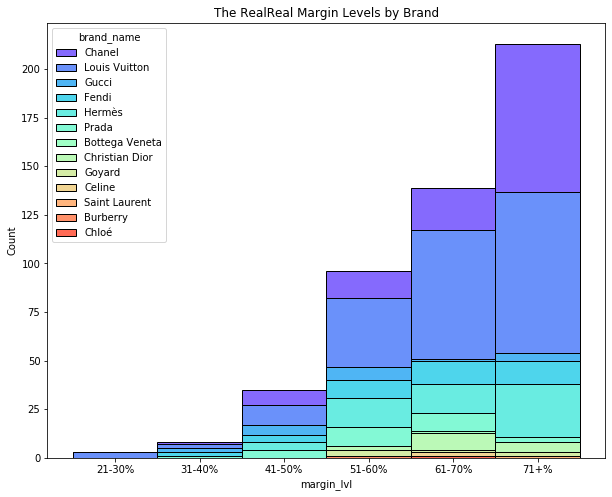

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(x='margin_lvl', data=rr_mr[~rr_mr['margin_lvl'].isnull()],
            hue='brand_name', stat='count', multiple='stack', palette='rainbow')
plt.title('The RealReal Margin Levels by Brand')
plt.show()

In [35]:
round(rr_mr.groupby('brand_name')['price'].mean(),2)

brand_name
Balenciaga              467.77
Bottega Veneta          489.15
Burberry                342.53
Celine                  476.87
Chanel                 1975.00
Chloé                   418.75
Christian Dior          768.45
Etro                    114.00
Fendi                   451.26
Gianni Versace          286.00
Givenchy                288.50
Goyard                 1447.00
Gucci                   318.40
Hermès                 4071.64
Loewe                   372.00
Louis Vuitton           506.74
MCM                     246.38
Miu Miu                 185.00
Mulberry                254.00
Prada                   388.35
Saint Laurent           682.30
Salvatore Ferragamo     309.33
Stella McCartney        168.00
Valentino               426.42
Versace                 235.00
Yves Saint Laurent      503.12
Name: price, dtype: float64

In [36]:
rr_b[rr_b['win']=='Y']['winning_bid'].mean()

2600.3125

In [37]:
rr_b[rr_b['win']=='Y'].groupby('brand_name')['winning_bid'].mean()

brand_name
Chanel            1007.9
Christian Dior    1684.0
Fendi              849.5
Hermès            9381.0
Name: winning_bid, dtype: float64

In [38]:
rr_s['price'].mean()

1258.2005333333332

## L-XXL
$30-180k in GMV

### Vivrelle

In [39]:
v_b=bid21[bid21['buyer_username']=='harley 2019']
v_s=stock21[stock21['buyer_username']=='harley 2019']
v_mr=min_resale[min_resale['buyer_username']=='harley 2019']

In [40]:
# percentage of won bids by brand
(v_b.groupby(['brand_name'])['win']
 .value_counts(normalize=True)*100).sort_index(ascending=False)

brand_name          win
Yves Saint Laurent  N      100.000000
Van Cleef & Arpels  Y       70.000000
                    N       30.000000
Saint Laurent       Y       50.000000
                    N       50.000000
Prada               Y       51.724138
                    N       48.275862
Mont Blanc          N      100.000000
Louis Vuitton       Y       20.749280
                    N       79.250720
Hermès              Y       29.411765
                    N       70.588235
Gucci               Y       35.416667
                    N       64.583333
Goyard              N      100.000000
Fendi               Y       37.500000
                    N       62.500000
Christian Dior      Y       21.153846
                    N       78.846154
Chloé               N      100.000000
Chanel              Y       29.310345
                    N       70.689655
Celine              Y       15.625000
                    N       84.375000
Bulgari             N      100.000000
Bottega Veneta      Y     

In [41]:
v_b['win'].value_counts(normalize=True)*100

N    72.943172
Y    27.056828
Name: win, dtype: float64

Win rate of 27.06%

In [42]:
top5_v=v_b['brand_name'].value_counts().index[:5]

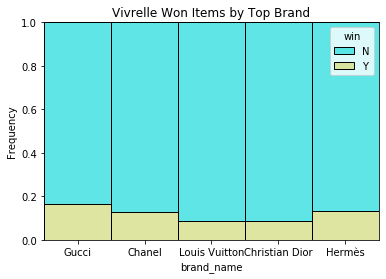

In [43]:
sns.histplot(x='brand_name', data=v_b[v_b['brand_name'].isin(top5_v)],
            hue='win', stat='frequency', multiple='fill', palette='rainbow',
            hue_order=['N','Y'])
plt.title('Vivrelle Won Items by Top Brand')
plt.show()

In [44]:
v_mr.loc[:,'has_min_resale']='N'
v_mr.loc[(~v_mr['min_resale'].isnull()), 'has_min_resale']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
v_mr['has_min_resale'].value_counts(normalize=True)*100

N    78.444444
Y    21.555556
Name: has_min_resale, dtype: float64

Only 21.56% of Vivrelle's purchases have minimum resale

In [46]:
v_mr['margin_lvl'].value_counts().sort_index()

<0%        0
0-10%      0
11-20%     0
21-30%     0
31-40%     0
41-50%     1
51-60%     2
61-70%     3
71+%      91
Name: margin_lvl, dtype: int64

Vivrelle has only bought stock with margins>40%.

In [47]:
v_mr.groupby('brand_name')['margin_lvl'].value_counts().sort_index()

brand_name          margin_lvl
Balenciaga          71+%           1
Celine              71+%           2
Chanel              71+%          31
Christian Dior      51-60%         1
                    71+%           6
Fendi               41-50%         1
                    71+%           2
Gucci               61-70%         2
                    71+%          11
Louis Vuitton       51-60%         1
                    61-70%         1
                    71+%          27
Prada               71+%           2
Saint Laurent       71+%           1
Yves Saint Laurent  71+%           8
Name: margin_lvl, dtype: int64

Margin level by brand

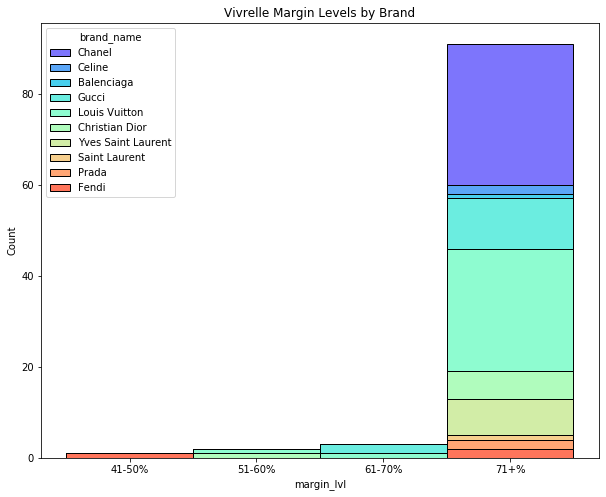

In [48]:
plt.figure(figsize=(10,8))
sns.histplot(x='margin_lvl', data=v_mr[~v_mr['margin_lvl'].isnull()],
            hue='brand_name', stat='count', multiple='stack', palette='rainbow')
plt.title('Vivrelle Margin Levels by Brand')
plt.show()

In [49]:
round(v_mr.groupby('brand_name')['price'].mean(),2)

brand_name
Balenciaga             648.00
Bottega Veneta        1747.73
Celine                1286.54
Chanel                2381.71
Christian Dior        1890.20
Fendi                  949.32
Givenchy              1191.40
Goyard                1997.50
Gucci                 1170.07
Hermès                1626.73
Louis Vuitton         1717.20
Prada                 1151.27
Saint Laurent         1256.00
Van Cleef & Arpels    2109.31
Yves Saint Laurent    1165.42
Name: price, dtype: float64

In [50]:
v_b[v_b['win']=='Y']['winning_bid'].mean()

1588.0344827586207

In [51]:
round(v_b[v_b['win']=='Y'].groupby('brand_name')['winning_bid'].mean(),2)

brand_name
Balenciaga            1297.40
Bottega Veneta         967.00
Celine                1107.60
Chanel                1979.32
Christian Dior        1169.27
Fendi                 1335.83
Gucci                  918.24
Hermès                1241.25
Louis Vuitton         1532.86
Prada                  956.40
Saint Laurent         1313.50
Van Cleef & Arpels    1988.71
Name: winning_bid, dtype: float64

In [52]:
v_s['price'].mean()

1955.0034699453558

### Bagriculture

In [53]:
b_b=bid21[bid21['buyer_username']=='bagriculture']
b_s=stock21[stock21['buyer_username']=='bagriculture']
# no stock

In [54]:
# percentage of won bids by brand
(b_b.groupby(['brand_name'])['win']
 .value_counts(normalize=True)*100).sort_index(ascending=False)

brand_name           win
Yves Saint Laurent   Y       13.333333
                     N       86.666667
Versace              Y        9.090909
                     N       90.909091
Van Cleef & Arpels   Y       21.428571
                     N       78.571429
Valentino Garavani   N      100.000000
Valentino            Y       30.000000
                     N       70.000000
Tiffany & Co.        N      100.000000
Saint Laurent        N      100.000000
Rolex                Y        8.000000
                     N       92.000000
Ralph Lauren         N      100.000000
Prada                Y        9.345794
                     N       90.654206
Moschino             Y      100.000000
Miu Miu              N      100.000000
MCM                  Y        4.597701
                     N       95.402299
Louis Vuitton        Y        7.830552
                     N       92.169448
Hermès               Y        8.279221
                     N       91.720779
Gucci                Y       10.714286


In [55]:
b_b['win'].value_counts(normalize=True)*100

N    91.827021
Y     8.172979
Name: win, dtype: float64

Low win rate of 8.17%

In [56]:
top5_b=b_b['brand_name'].value_counts().index[:5]

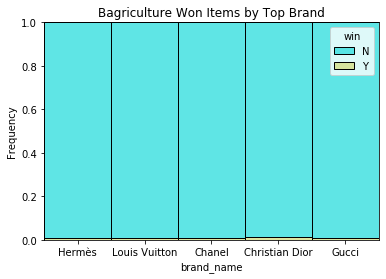

In [57]:
sns.histplot(x='brand_name', data=b_b[b_b['brand_name'].isin(top5_b)],
            hue='win', stat='frequency', multiple='fill', palette='rainbow',
            hue_order=['N','Y'])
plt.title('Bagriculture Won Items by Top Brand')
plt.show()

In [58]:
b_b[b_b['win']=='Y']['winning_bid'].mean()

433.1314475873544

Average price of item for bids won by Bagriculture.

In [59]:
round(b_b[b_b['win']=='Y'].groupby('brand_name')['winning_bid'].mean(),2)

brand_name
Balenciaga            203.00
Bottega Veneta        184.67
Burberry              141.06
Chanel                485.19
Christian Dior        316.92
Fendi                 278.89
Ferragamo             122.67
Givenchy              129.00
Goyard                558.61
Gucci                 259.54
Hermès                421.36
Louis Vuitton         458.21
MCM                   166.75
Moschino              483.00
Prada                 307.80
Rolex                 866.00
Valentino             165.33
Van Cleef & Arpels    667.67
Versace               249.00
Yves Saint Laurent     73.00
Name: winning_bid, dtype: float64

## S-M 
$5k-30k in GMV

### Season 2 Consign

In [60]:
s2_b=bid21[bid21['buyer_username']=='season 2 consign']
s2_s=stock21[stock21['buyer_username']=='season 2 consign']
s2_mr=min_resale[min_resale['buyer_username']=='season 2 consign']

In [61]:
(s2_b.groupby('brand_name')['win'].value_counts(normalize=True)*100).sort_index()

brand_name      win
Bottega Veneta  N      100.000000
Chanel          N       90.322581
                Y        9.677419
Christian Dior  N      100.000000
Fendi           N       66.666667
                Y       33.333333
Gucci           N       60.606061
                Y       39.393939
Hermès          N      100.000000
Louis Vuitton   N       79.746835
                Y       20.253165
Prada           N       46.153846
                Y       53.846154
Saint Laurent   N      100.000000
Name: win, dtype: float64

In [62]:
s2_b['win'].value_counts(normalize=True)*100

N    69.767442
Y    30.232558
Name: win, dtype: float64

Season 2 Consign has a win rate of 30.23%

In [63]:
top5_s2=s2_b['brand_name'].value_counts().index[:5]

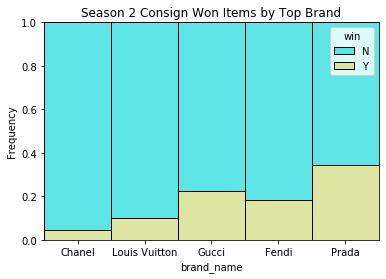

In [64]:
sns.histplot(x='brand_name', data=s2_b[s2_b['brand_name'].isin(top5_s2)],
            hue='win', stat='frequency', multiple='fill', palette='rainbow',
            hue_order=['N','Y'])
plt.title('Season 2 Consign Won Items by Top Brand')
plt.show()

In [65]:
s2_mr.loc[:,'has_min_resale']='N'
s2_mr.loc[(~s2_mr['min_resale'].isnull()), 'has_min_resale']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
s2_mr['has_min_resale'].value_counts(normalize=True)*100

Y    50.0
N    50.0
Name: has_min_resale, dtype: float64

50% of Season 2 Consign's purchases had minimum resale prices.

In [67]:
s2_mr['margin_lvl'].value_counts().sort_index()

<0%        0
0-10%      0
11-20%     0
21-30%     4
31-40%     5
41-50%    20
51-60%    38
61-70%    62
71+%      73
Name: margin_lvl, dtype: int64

In [68]:
s2_mr.groupby('brand_name')['margin_lvl'].value_counts().sort_index()

brand_name          margin_lvl
Balenciaga          61-70%         2
Burberry            41-50%         1
Chanel              41-50%         2
                    51-60%         3
                    61-70%        15
                    71+%          19
Christian Dior      51-60%         2
                    61-70%         1
Fendi               51-60%         1
                    61-70%         1
                    71+%           1
Givenchy            41-50%         1
                    61-70%         1
Goyard              31-40%         1
Gucci               31-40%         2
                    41-50%         8
                    51-60%         5
                    61-70%         6
                    71+%           2
Hermès              51-60%         1
Louis Vuitton       21-30%         4
                    31-40%         2
                    41-50%         8
                    51-60%        24
                    61-70%        34
                    71+%          49
Prada  

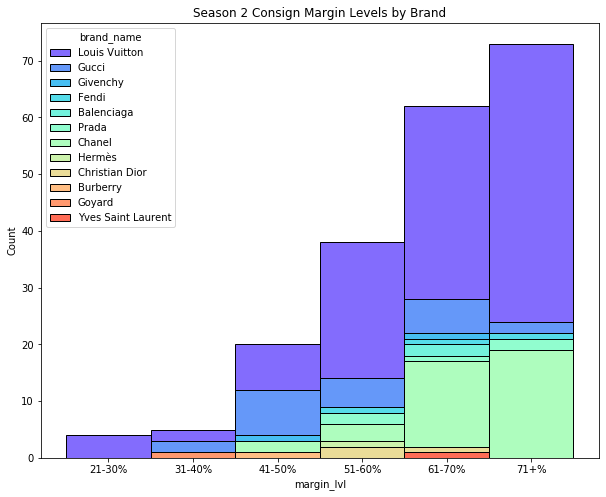

In [69]:
plt.figure(figsize=(10,8))
sns.histplot(x='margin_lvl', data=s2_mr[~s2_mr['margin_lvl'].isnull()],
            hue='brand_name', stat='count', multiple='stack', palette='rainbow')
plt.title('Season 2 Consign Margin Levels by Brand')
plt.show()

In [70]:
round(s2_mr.groupby('brand_name')['price'].mean(),2)

brand_name
Balenciaga             369.20
Bottega Veneta         398.33
Burberry               179.67
Celine                 516.00
Chanel                1176.70
Chloé                  719.00
Christian Dior         471.77
Coach                  287.00
Fendi                  467.73
Gianni Versace         273.00
Givenchy               340.19
Goyard                1013.00
Gucci                  432.68
Hermès                 545.79
Loewe                 1215.00
Louis Vuitton          595.00
MCM                    189.00
Prada                  387.19
Saint Laurent          734.50
Valentino              720.49
Van Cleef & Arpels     503.00
Yves Saint Laurent     517.80
Name: price, dtype: float64

In [71]:
s2_b[s2_b['win']=='Y']['winning_bid'].mean()

295.3974358974359

In [72]:
round(s2_b[s2_b['win']=='Y'].groupby('brand_name')['winning_bid'].mean(),2)

brand_name
Chanel           368.00
Fendi            307.17
Gucci            289.73
Louis Vuitton    319.62
Prada            266.86
Name: winning_bid, dtype: float64

In [73]:
s2_s['price'].mean()

658.7229950495049

### Chic to Chic

In [74]:
c_b=bid21[bid21['buyer_username']=='chic to chic']
c_s=stock21[stock21['buyer_username']=='chic to chic']
c_mr=min_resale[min_resale['buyer_username']=='chic to chic']